In [1]:
# Importando módulos
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importando dados
nos = pd.read_excel('Resources/Entrada.xlsx', sheet_name='Nós')
barras = pd.read_excel('Resources/Entrada.xlsx', sheet_name='Barras')

# Ajustando os numeros de nós e barras
nos.index += 1
barras.index += 1

# Remoção dos NaN's, trocando por zeros
nos.fillna(0, inplace=True)

In [3]:
nos

,X,Y,RX,RY,FX,FY
1,0,0,1.0,1.0,0.0,0.0
2,2,1,0.0,0.0,8000.0,-9000.0
3,2,0,0.0,0.0,0.0,0.0
4,4,2,0.0,0.0,8000.0,-9000.0
5,4,0,0.0,0.0,0.0,0.0
6,6,3,0.0,0.0,0.0,-15000.0
7,6,0,0.0,0.0,0.0,0.0
8,8,2,0.0,0.0,-8000.0,-9000.0
9,8,0,0.0,0.0,0.0,0.0
10,10,1,0.0,0.0,-8000.0,-9000.0


In [32]:
barras

,N1,N2,A,E
1,1,2,0.01,210000000000
2,1,3,0.01,210000000000
3,2,3,0.01,210000000000
4,2,4,0.01,210000000000
5,2,5,0.01,210000000000
6,3,5,0.01,210000000000
7,4,5,0.01,210000000000
8,4,6,0.01,210000000000
9,4,7,0.01,210000000000
10,5,7,0.01,210000000000


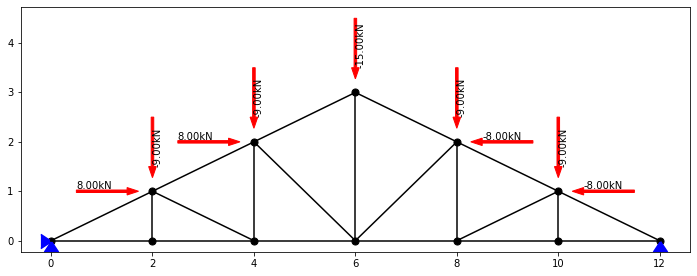

In [31]:
# Desenhando a estrutura
plt.figure(1, figsize=(12,4.5))

for barra in barras.index: 
    # Nós que compõem as barras
    N1, N2 = barras.loc[barra, ['N1', 'N2']]
    
    # Determinação das coordenadas
    x1, y1 = nos.loc[N1, ['X', 'Y']]
    x2, y2 = nos.loc[N2, ['X', 'Y']]
    
    # Vetores de Xs e Ys
    X = np.array([x1, x2])
    Y = np.array([y1, y2])
    
    plt.plot(X, Y, color='black')
    
for no in nos.index:
    # Importando dados dos nós 
    X, Y, RX, RY, FX, FY = nos.loc[no]
    
    # Desenhando rotulas
    plt.scatter(X, Y, s=50, color='black', marker="o") # 6 é restrição vertical e 5 na horizontal
    
    # Desenhando os apoios
    if RX == 1:
        plt.scatter(X, Y, s=200, color='blue', marker=5) # 6 é restrição vertical e 5 na horizontal
    if RY == 1:
        plt.scatter(X, Y, s=200, color='blue', marker=6) # 6 é restrição vertical e 5 na horizontal
    
    # Desenhando forças
    if FX > 0:
        plt.arrow(X-1.5, Y, 1, 0, color='r', width=0.05)
        plt.text(X-1.5, Y, '{:.2f}kN'.format(FX/1000), va='bottom')
    if FX < 0:
        plt.arrow(X+1.5, Y, -1, 0, color='r', width=0.05)
        plt.text(X+0.5, Y, '{:.2f}kN'.format(FX/1000), va='bottom')
    if FY > 0:
        plt.arrow(X, Y-1.5, 0, 1, color='r', width=0.05)
        plt.text(X, Y+0.5, '{:.2f}kN'.format(FY/1000), va='bottom', rotation=90)
    if FY < 0:
        plt.arrow(X, Y+1.5, 0, -1, color='r', width=0.05)
        plt.text(X, Y+0.5, '{:.2f}kN'.format(FY/1000), va='bottom', rotation=90)
        
# Exibe figura
plt.show()

In [33]:
# Determinação das propriedades das barras
Ls = []
senos = []
cossenos = []

for barra in barras.index:
    # Nós que compõem as barras
    N1, N2 = barras.loc[barra, ['N1', 'N2']]
    
    # Determinação das coordenadas
    x1, y1 = nos.loc[N1, ['X', 'Y']]
    x2, y2 = nos.loc[N2, ['X', 'Y']]
    
    # Projeções nos eixos X e Y
    LX = x2 - x1
    LY = y2 - y1
    # Tamanho real da barra
    L = np.sqrt(LX**2 + LY**2)
    
    # Seno e cosseno
    seno = LY/L
    coss = LX/L 
    
    # Pendurando nas listas
    Ls.append(L)
    senos.append(seno)
    cossenos.append(coss)

barras['L'] = Ls
barras['sen'] = senos
barras['cos'] = cossenos

barras

,N1,N2,A,E,L,sen,cos
1,1,2,0.01,210000000000,2.236068,0.447214,0.894427
2,1,3,0.01,210000000000,2.000000,0.000000,1.000000
3,2,3,0.01,210000000000,1.000000,-1.000000,0.000000
4,2,4,0.01,210000000000,2.236068,0.447214,0.894427
5,2,5,0.01,210000000000,2.236068,-0.447214,0.894427
6,3,5,0.01,210000000000,2.000000,0.000000,1.000000
7,4,5,0.01,210000000000,2.000000,-1.000000,0.000000
8,4,6,0.01,210000000000,2.236068,0.447214,0.894427
9,4,7,0.01,210000000000,2.828427,-0.707107,0.707107
10,5,7,0.01,210000000000,2.000000,0.000000,1.000000


In [34]:
# Montagem da matriz de rigidez 
 
# Pré alocando a matriz de rigidez global
maxgl = 2*len(nos.index)
K = np.zeros([maxgl, maxgl])

print(np.shape(K))
print(np.size(K))

(24, 24)
576


In [38]:
for barra in barras.index:
    N1, N2, A, E, L, sen, cos = barras.loc[barra]
    
    # Matriz de rigidez no sistema local 
    Kl = E*A/L*np.array([[ 1, 0,-1, 0],
                         [ 0, 0, 0, 0], 
                         [-1, 0, 1, 0],
                         [ 0, 0, 0, 0]])

    # Matriz de rotação
    Mrot = np.array([[ cos,  sen,    0,   0],
                     [-sen,  cos,    0,   0],
                     [    0,   0,  cos, sen],
                     [    0,   0, -sen, cos]])
    
    # Rotação da matriz de rigidez
    Klr = np.dot(np.dot(Mrot.T, Kl), Mrot)
    
    # Determinação dos gls
    gl1 = int(2*N1-1)
    gl2 = int(2*N1)
    gl3 = int(2*N2-1)
    gl4 = int(2*N2)
    
    # Acoplamento da matriz global 
    K[gl1-1:gl2, gl1-1:gl2] += Klr[0:2, 0:2]
    K[gl3-1:gl4, gl1-1:gl2] += Klr[2:4, 0:2]
    K[gl1-1:gl2, gl3-1:gl4] += Klr[0:2, 2:4]
    K[gl3-1:gl4, gl3-1:gl4] += Klr[2:4, 2:4]